In [2]:
#dependencies 
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim


/home/jefflo/anaconda3/envs/gaze-torch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


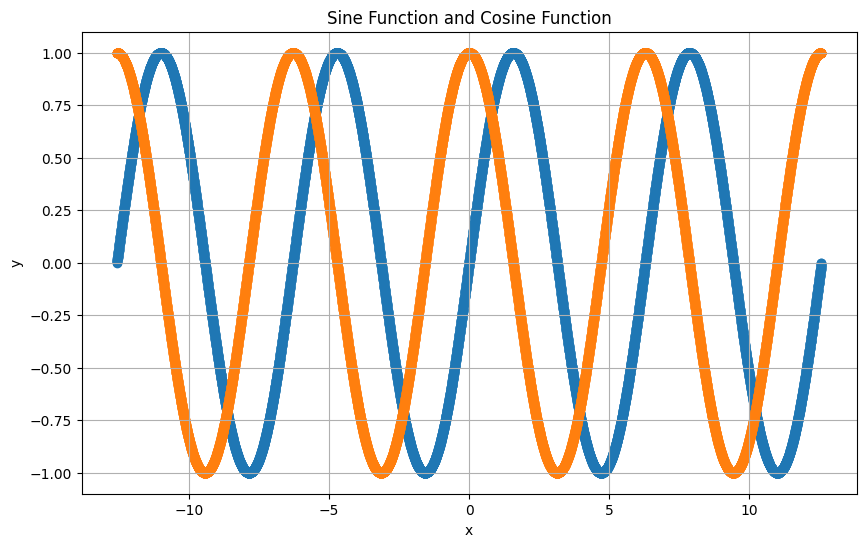

In [3]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 10000)
y = np.sin(x) 
yy = np.cos(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.scatter(x, yy)
plt.title("Sine Function and Cosine Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Epoch [100/10000], Loss: 0.3148
Epoch [200/10000], Loss: 0.0958
Epoch [300/10000], Loss: 0.0663
Epoch [400/10000], Loss: 0.0593
Epoch [500/10000], Loss: 0.0510
Epoch [600/10000], Loss: 0.0397
Epoch [700/10000], Loss: 0.0240
Epoch [800/10000], Loss: 0.0131
Epoch [900/10000], Loss: 0.0093
Epoch [1000/10000], Loss: 0.0037
Epoch [1100/10000], Loss: 0.0027
Epoch [1200/10000], Loss: 0.0013
Epoch [1300/10000], Loss: 0.0010
Epoch [1400/10000], Loss: 0.0039
Epoch [1500/10000], Loss: 0.0005
Epoch [1600/10000], Loss: 0.0005
Epoch [1700/10000], Loss: 0.0011
Epoch [1800/10000], Loss: 0.0004
Epoch [1900/10000], Loss: 0.0018
Epoch [2000/10000], Loss: 0.0003
Epoch [2100/10000], Loss: 0.0003
Epoch [2200/10000], Loss: 0.0019
Epoch [2300/10000], Loss: 0.0003
Epoch [2400/10000], Loss: 0.0004
Epoch [2500/10000], Loss: 0.0031
Epoch [2600/10000], Loss: 0.0002
Epoch [2700/10000], Loss: 0.0003
Epoch [2800/10000], Loss: 0.0006
Epoch [2900/10000], Loss: 0.0012
Epoch [3000/10000], Loss: 0.0004
Epoch [3100/10000],

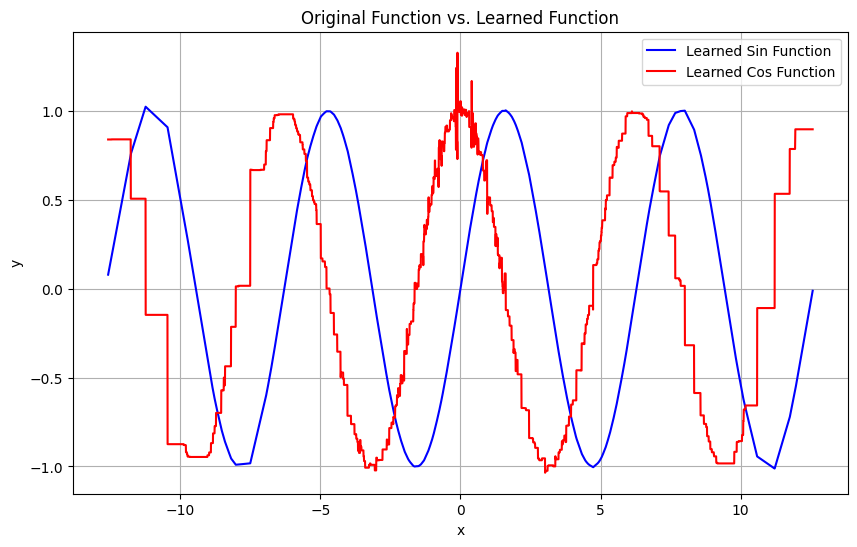

In [15]:
#transforming the input and output arrays to tensors
x_tensor = torch.from_numpy(x).float().view(-1, 1)
y_tensor = torch.from_numpy(y).float().view(-1, 1)

#implementing the model
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden = nn.Linear(1, 128)
    self.hidden2 = nn.Linear(128, 256)
    self.hidden3 = nn.Linear(256, 128)
    self.output = nn.Linear(128, 1)
  
  def forward(self, input):
    input.requires_grad_(True)
    x = torch.relu(self.hidden(input))
    x = torch.relu(self.hidden2(x))
    x = torch.relu(self.hidden3(x))
    y = self.output(x)
    yy = torch.autograd.grad(y, input, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    return y, yy

#instantiating the model, criterion (loss function), and optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#training loop
num_epochs = 10000
for epoch in range(num_epochs):
  #forward pass
  outputs, _ = model(x_tensor)
  loss = criterion(outputs, y_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

#inference and visualization

# Test the trained model
predicted1, predicted2 = model(x_tensor)

plt.figure(figsize=(10, 6))
#plt.scatter(x, y, color='blue', label='Original Function')
#plt.scatter(x, yy, color='blue', label='Original Function')
plt.plot(x, predicted1.detach().numpy(), color='blue', label='Learned Sin Function')
plt.plot(x, predicted2.detach().numpy(), color='red', label='Learned Cos Function')
plt.title("Original Function vs. Learned Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/10000], Loss: 0.5837
Epoch [200/10000], Loss: 0.2650
Epoch [300/10000], Loss: 0.2244
Epoch [400/10000], Loss: 0.1569
Epoch [500/10000], Loss: 0.1009
Epoch [600/10000], Loss: 0.0789
Epoch [700/10000], Loss: 0.0446
Epoch [800/10000], Loss: 0.0283
Epoch [900/10000], Loss: 0.0234
Epoch [1000/10000], Loss: 0.0182
Epoch [1100/10000], Loss: 0.0155
Epoch [1200/10000], Loss: 0.0208
Epoch [1300/10000], Loss: 0.0084
Epoch [1400/10000], Loss: 0.0068
Epoch [1500/10000], Loss: 0.0062
Epoch [1600/10000], Loss: 0.0105
Epoch [1700/10000], Loss: 0.0058
Epoch [1800/10000], Loss: 0.0069
Epoch [1900/10000], Loss: 0.0053
Epoch [2000/10000], Loss: 0.0087
Epoch [2100/10000], Loss: 0.0070
Epoch [2200/10000], Loss: 0.0081
Epoch [2300/10000], Loss: 0.0052
Epoch [2400/10000], Loss: 0.0049
Epoch [2500/10000], Loss: 0.0037
Epoch [2600/10000], Loss: 0.0051
Epoch [2700/10000], Loss: 0.0037
Epoch [2800/10000], Loss: 0.0032
Epoch [2900/10000], Loss: 0.0040
Epoch [3000/10000], Loss: 0.0070
Epoch [3100/10000],

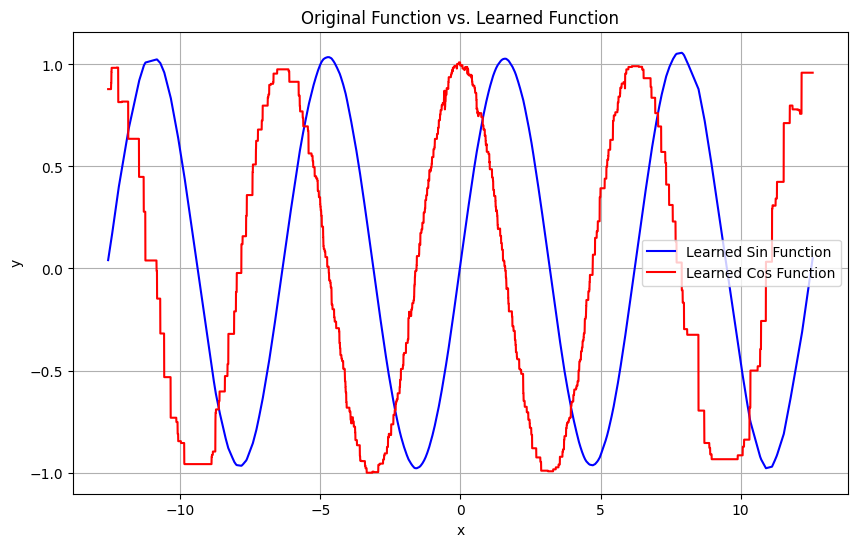

In [16]:
#transforming the input and output arrays to tensors
x_tensor = torch.from_numpy(x).float().view(-1, 1)
y_tensor = torch.from_numpy(y).float().view(-1, 1)
yy_tensor = torch.from_numpy(yy).float().view(-1, 1)

#instantiating the model, criterion (loss function), and optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#training loop
num_epochs = 10000
for epoch in range(num_epochs):
  #forward pass
  outputs1, outputs2 = model(x_tensor)
  loss = criterion(outputs1, y_tensor) + criterion(outputs2, yy_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

#inference and visualization

# Test the trained model
predicted1, predicted2 = model(x_tensor)

# Plot the original function and the learned function
plt.figure(figsize=(10, 6))
#plt.scatter(x, y, color='blue', label='Original Function')
#plt.scatter(x, yy, color='blue', label='Original Function')
plt.plot(x, predicted1.detach().numpy(), color='blue', label='Learned Sin Function')
plt.plot(x, predicted2.detach().numpy(), color='red', label='Learned Cos Function')
plt.title("Original Function vs. Learned Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()